In [39]:
import numpy as np
from numpy import load
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras

In [40]:
X_train=load('X_train_sr.npy')
y_train=load('y_train_sr.npy')
X_test=load('X_test_sr.npy')
y_test=load('y_test_sr.npy')

In [41]:
X_train.shape

(87000, 80, 80, 1)

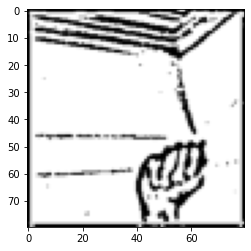

In [42]:
plt.imshow(X_train[300],cmap='gray')

In [43]:
X_train,y_train=shuffle(X_train,y_train,random_state=0)

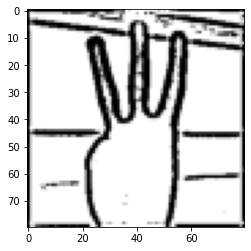

In [44]:
plt.imshow(X_train[0],cmap='gray')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_Val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42)

In [47]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_val = to_categorical(y_val)

In [48]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
y_cat_val[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [50]:
class_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dense, Flatten,Dropout

In [61]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(80,80,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(29,activation ="softmax"))

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)             

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
from tensorflow.keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

In [65]:

history=model.fit(X_train, y_cat_train,epochs=10,batch_size=64,validation_data=(X_Val, y_cat_val),callbacks =[earlystopping])

Epoch 1/10
1156/1156 [==============================] - 492s 425ms/step - loss: 1.1048 - accuracy: 0.6590 - val_loss: 0.1804 - val_accuracy: 0.9384
Epoch 2/10
1156/1156 [==============================] - 473s 409ms/step - loss: 0.0946 - accuracy: 0.9677 - val_loss: 0.0716 - val_accuracy: 0.9754
Epoch 3/10
1156/1156 [==============================] - 474s 410ms/step - loss: 0.0530 - accuracy: 0.9820 - val_loss: 0.0543 - val_accuracy: 0.9815
Epoch 4/10
1156/1156 [==============================] - 479s 415ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 5/10
1156/1156 [==============================] - 478s 414ms/step - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 6/10
1156/1156 [==============================] - 465s 403ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0150 - val_accuracy: 0.9952
Epoch 7/10
1156/1156 [==============================] - 422s 365ms/step - loss: 0.0210 - accuracy: 0.9929 - val_

In [66]:
model.save('final_model_sign_recognisation.h5')